# Library

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [8]:
import torch
from transformers import BertTokenizer, BertForMaskedLM, pipeline
from datasets import load_dataset
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import pandas as pd

# Dataset

In [10]:
df = pd.read_csv('test.csv')
df.head()

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


In [11]:
df = df.drop(['id'], axis=1)
df.head()

,article,highlights
0,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


# Pre-Processing

In [12]:
# Cleansing text

import re
def preprocessing_text(text):

    # Lower Case
    text = text.lower()

    # Delete URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Delete email
    text = re.sub(r'\S+@\S+', '', text)

    # Delete tag html
    text = re.sub(r'<a href.*?>.*?</a>', '', text)

    # Delete special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Delete spacing
    text = re.sub(r'\s+', ' ', text)

    return text

df['new_article'] = df['article'].apply(preprocessing_text)
df['new_highlights'] = df['highlights'].apply(preprocessing_text)
df.head()

,article,highlights,new_article,new_highlights
0,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...,ever noticed how plane seats appear to be gett...,experts question if packed out planes are putt...
1,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...,a drunk teenage boy had to be rescued by secur...,drunk teenage boy climbed into lion enclosure ...
2,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...,dougie freedman is on the verge of agreeing a ...,nottingham forest are close to extending dougi...
3,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...,liverpool target neto is also wanted by psg an...,fiorentina goalkeeper neto has been linked wit...
4,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6...",bruce jenner will break his silence in a twoho...,tellall interview with the reality tv star wil...


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [16]:
#!pip install tqdm
from tqdm import tqdm
import pandas as pd
tqdm.pandas()

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
# Tokenization for StopWord
from nltk.tokenize import word_tokenize
import nltk
import string

# nltk.download('punkt')
# nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
def preprocessing_text(text, stop_words):
    proc = word_tokenize(text)
    proc = [i for i in proc if not i in stop_words]
    proc = [i for i in proc if i not in string.punctuation]
    return proc

df['new_article'] = df['new_article'].progress_apply(preprocessing_text,args=(stop_words,))
df['new_highlights'] = df['new_highlights'].progress_apply(preprocessing_text,args=(stop_words,))
df.head()

100%|██████████| 11490/11490 [00:03<00:00, 3250.60it/s]


,article,highlights,new_article,new_highlights
0,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...,"[ever, noticed, plane, seats, appear, getting,...","[experts, question, packed, planes, putting, p..."
1,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...,"[drunk, teenage, boy, rescued, security, jumpi...","[drunk, teenage, boy, climbed, lion, enclosure..."
2,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...,"[dougie, freedman, verge, agreeing, new, twoye...","[nottingham, forest, close, extending, dougie,..."
3,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...,"[liverpool, target, neto, also, wanted, psg, c...","[fiorentina, goalkeeper, neto, linked, liverpo..."
4,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6...","[bruce, jenner, break, silence, twohour, inter...","[tellall, interview, reality, tv, star, air, f..."


# WordCloud

In [18]:
token_list = []
for article in df['new_article']:
    tokens = article
    token_list.extend(tokens)

print(token_list[:100])

['ever', 'noticed', 'plane', 'seats', 'appear', 'getting', 'smaller', 'smaller', 'increasing', 'numbers', 'people', 'taking', 'skies', 'experts', 'questioning', 'packed', 'planes', 'putting', 'passengers', 'risk', 'say', 'shrinking', 'space', 'aeroplanes', 'uncomfortable', 'putting', 'health', 'safety', 'danger', 'squabbling', 'arm', 'rest', 'shrinking', 'space', 'planes', 'putting', 'health', 'safety', 'danger', 'week', 'us', 'consumer', 'advisory', 'group', 'set', 'department', 'transportation', 'said', 'public', 'hearing', 'government', 'happy', 'set', 'standards', 'animals', 'flying', 'planes', 'doesnt', 'stipulate', 'minimum', 'amount', 'space', 'humans', 'world', 'animals', 'rights', 'space', 'food', 'humans', 'said', 'charlie', 'leocha', 'consumer', 'representative', 'committee', 'time', 'dot', 'faa', 'take', 'stand', 'humane', 'treatment', 'passengers', 'could', 'crowding', 'planes', 'lead', 'serious', 'issues', 'fighting', 'space', 'overhead', 'lockers', 'crashing', 'elbows', 

In [21]:
token_list2 = []
for highlights in df['new_highlights']:
    tokens = highlights
    token_list2.extend(tokens)

print(token_list2[:100])

['experts', 'question', 'packed', 'planes', 'putting', 'passengers', 'risk', 'us', 'consumer', 'advisory', 'group', 'says', 'minimum', 'space', 'must', 'stipulated', 'safety', 'tests', 'conducted', 'planes', 'leg', 'room', 'airlines', 'offer', 'drunk', 'teenage', 'boy', 'climbed', 'lion', 'enclosure', 'zoo', 'west', 'india', 'rahul', 'kumar', 'ran', 'towards', 'animals', 'shouting', 'today', 'kill', 'lion', 'fortunately', 'fell', 'moat', 'reaching', 'lions', 'rescued', 'nottingham', 'forest', 'close', 'extending', 'dougie', 'freedmans', 'contract', 'forest', 'boss', 'took', 'former', 'manager', 'stuart', 'pearce', 'february', 'freedman', 'since', 'lead', 'club', 'ninth', 'championship', 'fiorentina', 'goalkeeper', 'neto', 'linked', 'liverpool', 'arsenal', 'neto', 'joined', 'firoentina', 'brazilian', 'outfit', 'atletico', 'paranaense', 'also', 'wanted', 'psg', 'spanish', 'clubs', 'according', 'agent', 'click', 'latest', 'liverpool', 'news', 'tellall', 'interview', 'reality', 'tv', 'star

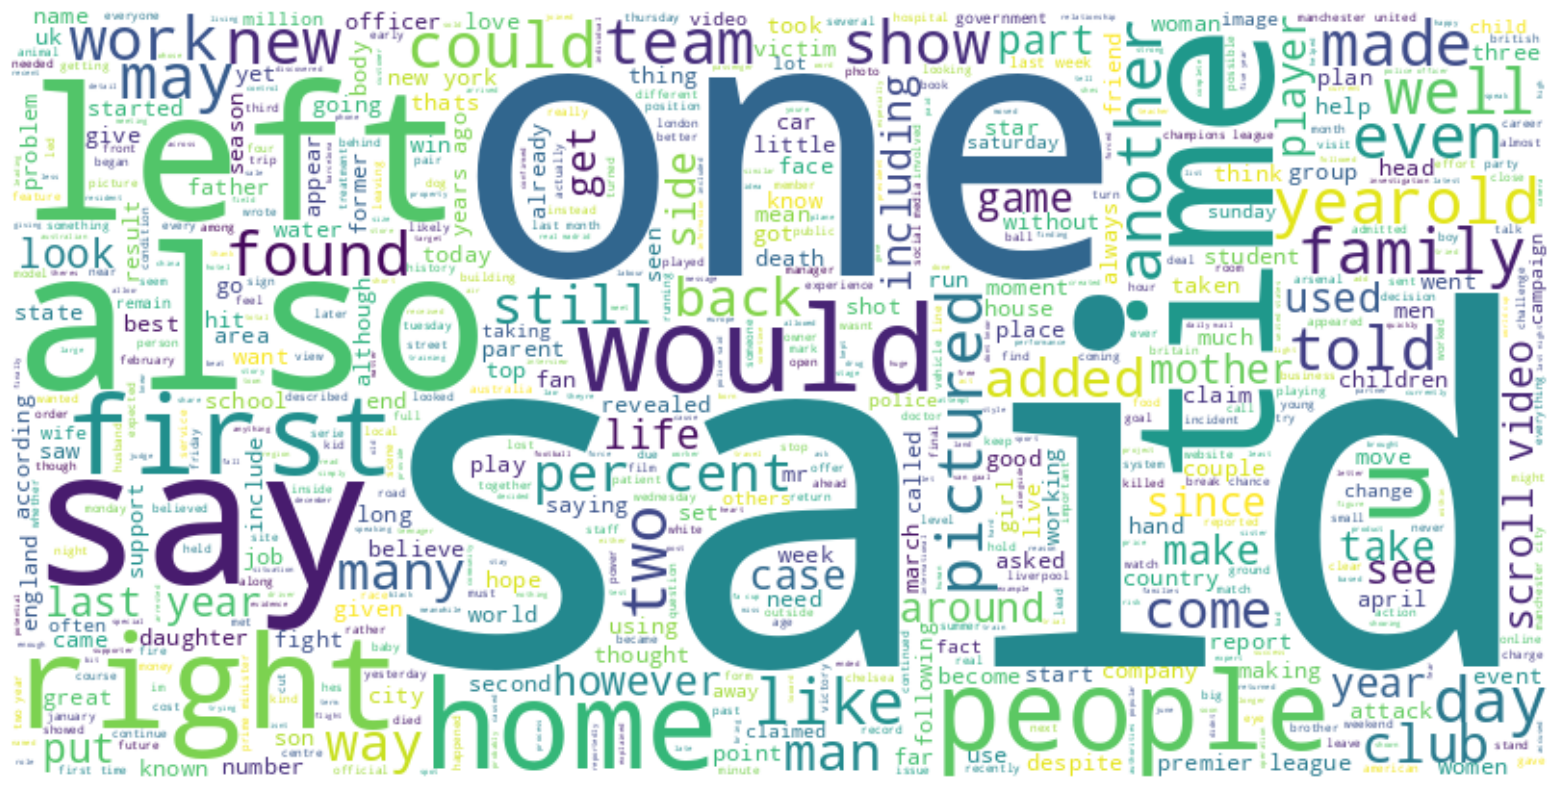

In [ ]:
wc = WordCloud(width=800, height=400,background_color="white",max_words=1000,stopwords=stop_words).generate_from_text(' '.join(token_list)) # Changed 'a' to 'stop_words'
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

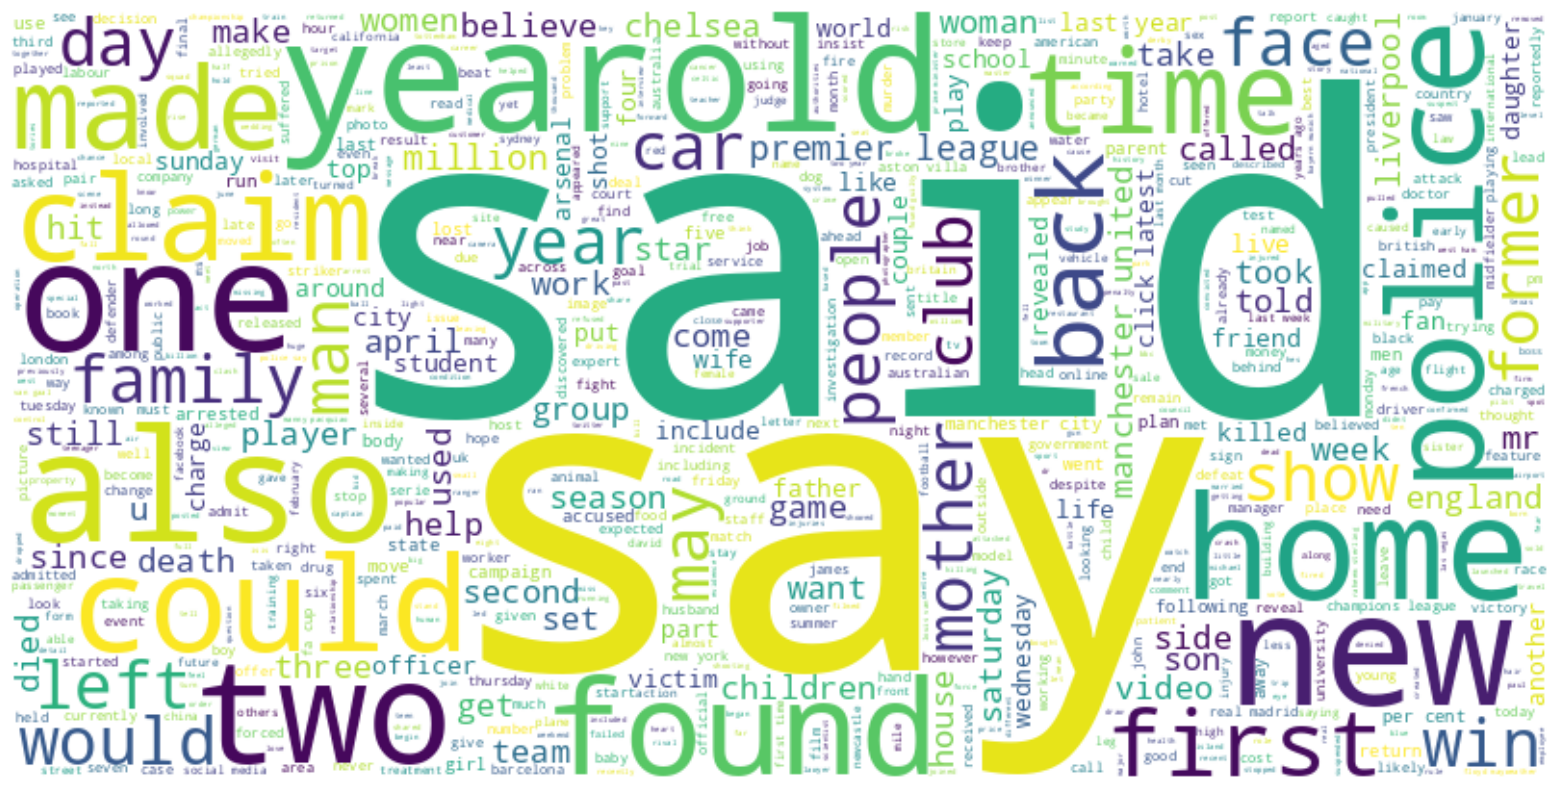

In [22]:
wc = WordCloud(width=800, height=400,background_color="white",max_words=1000,stopwords=stop_words).generate_from_text(' '.join(token_list2)) # Changed 'a' to 'stop_words'
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Model Training

In [23]:
#!pip install scikit-learn
from sklearn.model_selection import train_test_split # Importing the necessary function

In [24]:
#!pip install datasets
from datasets import Dataset, DatasetDict # Import DatasetDict along with Dataset
import pandas as pd

In [25]:
#!pip install transformers datasets
from transformers import BartTokenizer, BertTokenizer, BertForMaskedLM, pipeline, BartForConditionalGeneration
from datasets import load_dataset
from matplotlib import pyplot as plt

In [26]:
# Split dataset

train_texts, test_texts, train_summaries, test_summaries = train_test_split(
    df["article"], df["new_highlights"], test_size=0.1, random_state=42
)
train_texts, val_texts, train_summaries, val_summaries = train_test_split(
    train_texts, train_summaries, test_size=0.1, random_state=42
)

# Create dataset for hugging face
dataset = DatasetDict({
    "train": Dataset.from_pandas(pd.DataFrame({"article": train_texts, "new_highlights": train_summaries})),
    "validation": Dataset.from_pandas(pd.DataFrame({"article": val_texts, "new_highlights": val_summaries})),
    "test": Dataset.from_pandas(pd.DataFrame({"article": test_texts, "new_highlights": test_summaries})),
})

In [ ]:
# Load BartTokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")

# Define tokenization function
def tokenize_function(batch):
    inputs = tokenizer(batch["article"], max_length=512, truncation=True, padding="max_length")
    # Convert list of tokens to a single string before tokenization
    targets = tokenizer([' '.join(highlight) for highlight in batch["new_highlights"]], max_length=128, truncation=True, padding="max_length")

    inputs["labels"] = targets["input_ids"]
    return inputs

# Apply tokenization to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["article", "new_highlights"])

Map:   0%|          | 0/9306 [00:00<?, ? examples/s]

Map:   0%|          | 0/1035 [00:00<?, ? examples/s]

Map:   0%|          | 0/1149 [00:00<?, ? examples/s]

In [ ]:
model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

# Model Evaluation

In [ ]:
from transformers import TrainingArguments, Trainer

In [ ]:
def summarize_text(text, model, tokenizer):
        inputs = tokenizer(text, max_length=512, truncation=True, return_tensors="pt")
        summary_ids = model.generate(inputs["input_ids"], max_length=256, num_beams=4, early_stopping=True)  # Increase max_length
        return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
# Use the test set for evaluation
def summarize_text(text, model, tokenizer):
    inputs = tokenizer(text, max_length=1024, truncation=True, return_tensors="pt")
    summary_ids = model.generate(inputs["input_ids"], max_length=128, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)


In [ ]:
# Evaluate data with Extractive summarization
for idx in range(5):
    input_text = test_texts.iloc[idx]
    reference_summary = test_summaries.iloc[idx]
    generated_summary = summarize_text(input_text, model, tokenizer)

    print(f"\n**Text:** {input_text}")
    print(f"**Reference Summary:** {reference_summary}")
    print(f"**Extractive Summary:** {generated_summary}")


**Original Text:** Comedian Jenny Eclair travelled with her other half on a Painting In Venus break with Flavours . There comes a time in a woman’s life when beach holidays just don’t cut it any longer, when lying on golden sands (unless you’re buried up to your neck) serves only to remind you how much weight you forgot to lose again this year and how ill-fitting your swimming costume is. Being control freaks, most fifty-something females find ‘doing nothing’ a bit boring – after all, there are only so many hours one can spend on a Kindle, and woman cannot live by fiction alone. This is the time when the ‘alternative holiday experience’ tickles your holiday tastebuds and you find yourself looking at brochures for Nordic cruises. Excellent! Everyone looks fat pointing at a fjord while wearing an Aran jumper. But apart from choosing chilly destinations such as the Arctic or Scarborough, your other non-lolling-about option is the ‘activity holiday’, which can range from Pilates to kayaki

In [ ]:
rouge = load_metric("rouge")
results = rouge.compute(predictions=predictions, references=reference_texts)

# Menampilkan hasil metrik ROUGE
for key, value in results.items():
    print(f"{key}: {value.mid}")

kekurangan :

- kurang model / hasil akurasinya dalam bentuk persentase dan plot (pendekatan rogue mungkin)
- mau nambah abstractive text (opsional)